# Typhoon's plot


In [1]:
%load_ext jupyter_black

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import imblearn
import statsmodels.api as sm

In [3]:
# Function to transform name of typhoons to lowercase and remove begining of years
def transform_strings(strings):
    transformed_strings = []
    for string in strings:
        transformed_string = string[0].upper() + string[1:-4].lower() + string[-2:]
        transformed_strings.append(transformed_string)
    return transformed_strings

In [4]:
typhoon_dam_10_lst = [
    "DURIAN2006",
    "FENGSHEN2008",
    "KETSANA2009",
    "BOPHA2012",
    # "NARI2013",
    "HAIYAN2013",
    "UTOR2013",
    "RAMMASUN2014",
    "HAGUPIT2014",
    "FUNG-WONG2014",
    # "LINGLING2014",
    "MELOR2015",
    "KOPPU2015",
    "MEKKHALA2015",
    "HAIMA2016",
    "MERANTI2016",
    "NOCK-TEN2016",
    "MANGKHUT2018",
    "KAMMURI2019",
    "PHANFONE2019",
    "GONI2020",
    "VAMCO2020",
    "VONGFONG2020",
]

In [9]:
# damage > 10 Naive baseline
df_naive_all_10 = pd.read_csv(
    "plot_data/df_naive_all_10_updated.csv"  # df_naive_all_10.csv
)
df_naive_all_10.head()

,Naive_rmse_all_10,Naive_ave_all_10
0,31.198236,-27.470951
1,21.475153,-17.635074
2,31.692320,-31.692320
3,45.520882,-40.106587
4,44.675070,-41.056957


In [10]:
# damage > 10 Combined model
df_all_10_new = pd.read_csv("plot_data/df_all_10_new_updated.csv")  # df_all_10_new.csv
df_all_10_new.head()

,rmse_all_10_new,ave_all_10_new
0,16.781495,-3.102352
1,17.492538,-8.393750
2,31.223499,-31.223499
3,36.804110,-31.241853
4,23.749733,-18.553451


In [11]:
# damage > 10 510 model
df_510_10_new = pd.read_csv("plot_data/df_510_10_new.csv")
df_510_10_new.head()

,rmse_510_10_new,ave_510_10_new
0,19.554278,-12.841934
1,17.359590,-9.046502
2,29.534467,-29.534467
3,25.644456,-15.099977
4,28.357359,-22.826976


In [12]:
len(df_all_10_new)

21

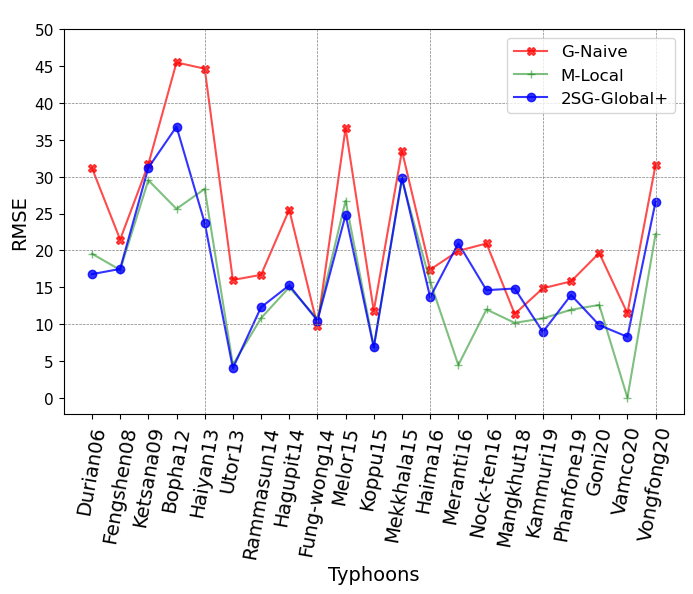

In [14]:
# Plot of Average Error estimation according to 12 different typhoons in test sets
plt.figure(figsize=(8, 5))
x = transform_strings(typhoon_dam_10_lst)

y = df_naive_all_10["Naive_rmse_all_10"]
y1 = df_510_10_new["rmse_510_10_new"]
y2 = df_all_10_new["rmse_all_10_new"]

plt.plot(x, y, color="red", alpha=0.7, marker="X")
plt.plot(x, y1, color="green", alpha=0.5, marker="+")
plt.plot(x, y2, color="blue", alpha=0.8, marker="o")

# plt.grid(axis='y')
# plt.grid(axis='x')

# Add horizontal gridlines
plt.axhline(y=10, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(y=20, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(y=30, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(y=40, color="gray", linestyle="--", linewidth=0.5)

# Add vertical gridlines
plt.axvline(x=4, color="gray", linestyle="--", linewidth=0.5)
# plt.text(4, plt.ylim()[1], 'Bopha12', ha='center', va='bottom')
plt.axvline(x=8, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=12, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=16, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=20, color="gray", linestyle="--", linewidth=0.5)


plt.xlabel("Typhoons", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title(" ")

# create legend
labels = [
    "G-Naive",  # Naive baseline
    "M-Local",
    "2SG-Global+",
]
plt.legend(labels, fontsize=12)

np.rot90(plt.xticks(rotation=80, fontsize=14))
plt.yticks(np.arange(0, 55, step=5), fontsize=11)
# plt.savefig("figures/new_typhoons_damage>10_RMSE(18July).pdf", bbox_inches="tight")
plt.show()

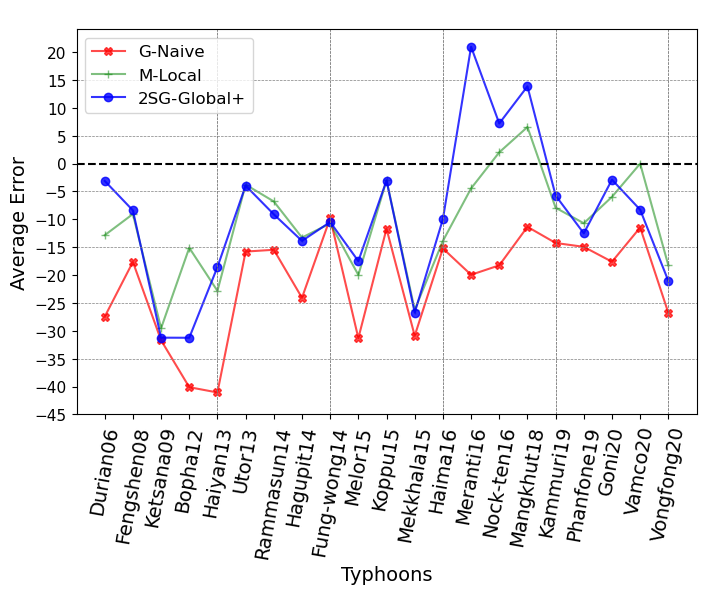

In [16]:
# Plot of Average Error estimation according to 12 different typhoons in test sets
plt.figure(figsize=(8, 5))
x = transform_strings(typhoon_dam_10_lst)

y = df_naive_all_10["Naive_ave_all_10"]
y1 = df_510_10_new["ave_510_10_new"]
y2 = df_all_10_new["ave_all_10_new"]

plt.plot(x, y, color="red", alpha=0.7, marker="X")
plt.plot(x, y1, color="green", alpha=0.5, marker="+")
plt.plot(x, y2, color="blue", alpha=0.8, marker="o")

# Add horizontal gridlines
plt.axhline(y=-35, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(y=-25, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(y=-15, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(y=-5, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(y=5, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(y=15, color="gray", linestyle="--", linewidth=0.5)

# Add vertical gridlines
plt.axvline(x=4, color="gray", linestyle="--", linewidth=0.5)
# plt.text(4, plt.ylim()[1], 'Bopha12', ha='center', va='bottom')
plt.axvline(x=8, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=12, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=16, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=20, color="gray", linestyle="--", linewidth=0.5)

# Add vertical gridlines
plt.axvline(x=4, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=8, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=12, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=16, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(x=20, color="gray", linestyle="--", linewidth=0.5)


plt.xlabel("Typhoons", fontsize=14)
plt.ylabel("Average Error", fontsize=14)
plt.title(" ")

# create legend
labels = [
    "G-Naive",  # Naive baseline
    "M-Local",
    "2SG-Global+",
]
plt.legend(labels, fontsize=12)

# Draw a dashed line at y=0
plt.axhline(0, color="black", linestyle="--")

np.rot90(plt.xticks(rotation=80, fontsize=14))
plt.yticks(np.arange(-45.0, 25.0, step=5), fontsize=11)
# plt.savefig("figures/new_typhoons_damage>10_AVE(18July).pdf", bbox_inches="tight")
plt.show()